In [1]:
!pip install openpyxl
!pip install japanize-matplotlib
import numpy as np
import pandas as pd
import os
import re
import itertools
from matplotlib import pyplot as plt
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=73a4ba048f36fcc5d5be24c05283cb37a0dab667eb2bdd998ee3cc6634a0affa
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [12]:
ns_st = ['泉中央', '八乙女', '黒松', '旭ヶ丘', '台原', '北仙台', '北四番丁', '勾当台公園', '広瀬通',
    '仙台', '五橋', '愛宕橋', '河原町', '長町一丁目', '長町', '長町南', '富沢']
ew_st = ['八木山動物公園', '青葉山', '川内', '国際センター', '大町西公園', '青葉通一番町', '仙台', '宮城野通', '連坊',
         '薬師堂', '卸町', '六丁の目', '荒井']
all_st = ns_st + [s for s in ew_st if s !='仙台']
cols = ['年月日', '乗車駅', '降車駅', '合計', '定期券外', '普通券計', '普通券大', '乗継計', '乗継大', '乗継小', '地下売', 'バス売', '一日券', 'プリペ', 'ICSF', 'その他', '定期計', '通勤', '通学', '学都', '公用', '敬老', 'ふれあい', 'その他.1']

In [13]:
FYs = [2018, 2019, 2020, 2021, 2022]
base_url = "https://raw.githubusercontent.com/nagae/SendaiTransportData/main/"
dfs = {FY:pd.read_csv(base_url+"data/Sendai_subway_OD_FY{}.csv".format(FY)) for FY in FYs}
df = pd.concat(dfs.values())

In [14]:
dfs[2018]

,年月日,乗車駅,降車駅,総計,定期以外計,普通券計,普通券大人,普通券小人,乗継計,乗継大人,...,ICSF,定期以外その他,定期計,通勤,通学,学都,公用,敬老,ふれあい,定期その他
0,2018-04-01,泉中央,八乙女,20836,9902,2114,1874,240,0,0,...,7510,0,10934,5770,234,1439,5,2433,1053,0
1,2018-04-01,泉中央,黒松,13794,7062,1332,1142,190,0,0,...,5580,0,6732,2758,242,912,0,2182,638,0
2,2018-04-01,泉中央,旭ヶ丘,19562,8887,1626,1364,262,0,0,...,7113,0,10675,4092,222,1856,2,3238,1265,0
3,2018-04-01,泉中央,台原,17599,8033,1519,1306,213,0,0,...,6410,0,9566,3503,284,3838,2,1291,648,0
4,2018-04-01,泉中央,北仙台,39399,17853,3136,2931,205,0,0,...,14544,0,21546,8517,2577,7472,6,1864,1110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,2019-03-01,荒井,宮城野通,6523,3007,459,421,38,0,0,...,2500,0,3516,2690,1,367,0,245,213,0
9740,2019-03-01,荒井,連坊,2095,922,158,152,6,0,0,...,747,0,1173,681,0,264,0,141,87,0
9741,2019-03-01,荒井,薬師堂,2556,1404,204,181,23,0,0,...,923,0,1152,541,0,217,0,202,192,0
9742,2019-03-01,荒井,卸町,4009,2165,373,331,42,0,0,...,1700,0,1844,1205,0,237,2,218,182,0


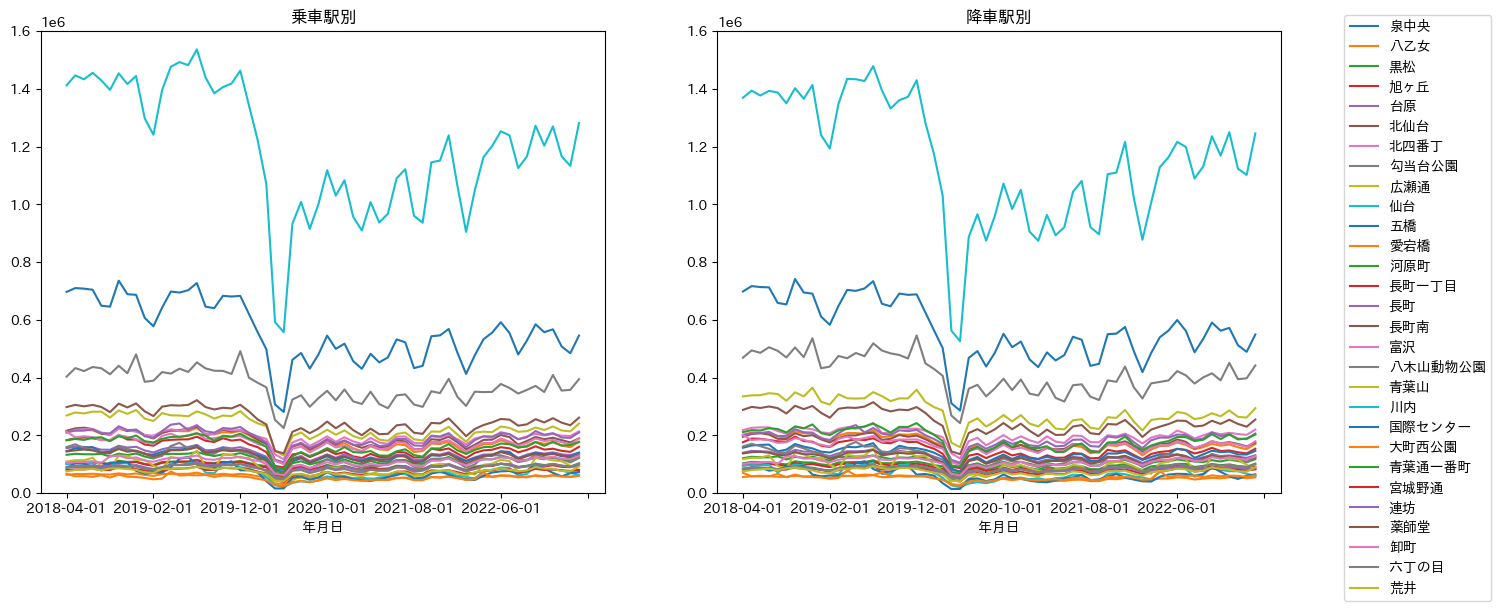

In [15]:
orig_df = df.groupby(["乗車駅","年月日"]).sum(numeric_only=True)["総計"]
dest_df = df.groupby(["降車駅","年月日"]).sum(numeric_only=True)["総計"]
fig, ax = plt.subplots(1, 2, figsize=(8*2,6))
for st in all_st:
    orig_df.xs(st, level="乗車駅").plot(ax=ax[0], label=st)
    dest_df.xs(st, level="降車駅").plot(ax=ax[1], label=st)
#ax[0].legend(bbox_to_anchor=(1.1, 1.05))
ax[1].legend(bbox_to_anchor=(1.1, 1.05))
ax[0].set_title("乗車駅別")
ax[1].set_title("降車駅別")
ax[0].set_ylim([0,1.6e6])
ax[1].set_ylim([0,1.6e6])
fig.savefig("乗車駅_降車駅別_利用者数.png", bbox_inches="tight")
fig.savefig("乗車駅_降車駅別_利用者数.pdf", bbox_inches="tight")